<h1 style='font-size:38px; align-item: center; color: #92B24B;'>Classification with an Academic Success Dataset</h1>


<img src="header.png" style="margin: 0 auto; " />


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)


<h1 style="color: #92B24B;">Reading the data  </h1>

In [2]:
df_train = pd.read_csv('data/train.csv')
df_test  = pd.read_csv('data/test.csv')

In [3]:
#Seeing the head of df_train
df_train.head()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,1,1,9238,1,1,126.0,1,1,19,5,5,122.6,0,0,0,1,0,1,18,0,0,6,6,6,14.500000,0,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,1,17,1,9238,1,1,125.0,1,19,19,9,9,119.8,1,0,0,1,0,0,18,0,0,6,8,4,11.600000,0,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,2,1,17,2,9254,1,1,137.0,1,3,19,2,3,144.7,0,0,0,1,1,0,18,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,3,1,1,3,9500,1,1,131.0,1,19,3,3,2,126.1,1,0,0,1,0,1,18,0,0,7,9,7,12.591250,0,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,4,1,1,2,9500,1,1,132.0,1,19,37,4,9,120.1,1,0,0,1,0,0,18,0,0,7,12,6,12.933333,0,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate


In [4]:
#Seeing the head of df_test
df_test.head()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,76518,1,1,1,9500,1,1,141.0,1,3,1,2,3,152.1,0,0,0,0,0,0,18,0,0,7,0,0,0.000000,0,0,8,0,0,0.000000,0,13.9,-0.3,0.79
1,76519,1,1,1,9238,1,1,128.0,1,1,19,4,5,116.5,0,0,0,1,0,0,19,0,0,6,7,6,14.857143,0,0,6,6,6,13.500000,0,11.1,0.6,2.02
2,76520,1,1,1,9238,1,1,118.0,1,1,19,4,9,114.2,0,0,0,1,0,1,18,0,0,6,11,6,12.000000,0,0,6,11,5,11.000000,0,15.5,2.8,-4.06
3,76521,1,44,1,9147,1,39,130.0,1,1,19,3,3,130.0,0,0,0,1,0,1,23,0,2,6,15,5,11.500000,0,3,8,14,5,11.000000,0,8.9,1.4,3.51
4,76522,1,39,1,9670,1,1,110.0,1,1,37,5,5,106.0,1,0,0,1,0,0,26,0,0,6,9,3,11.000000,0,0,6,9,4,10.666667,2,7.6,2.6,0.32



<h3 style="color: #92B24B;">Seeing the shape of the data</h3>

In [5]:
print('The shape of train data is: ', df_train.shape)
print('The shape of test data is: ', df_test.shape)

The shape of train data is:  (76518, 38)
The shape of test data is:  (51012, 37)


In [6]:
#Seeing the columns
df_train.columns

Index(['id', 'Marital status', 'Application mode', 'Application order',
       'Course', 'Daytime/evening attendance', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units

In [7]:
#Let's see the info of the data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76518 entries, 0 to 76517
Data columns (total 38 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   id                                              76518 non-null  int64  
 1   Marital status                                  76518 non-null  int64  
 2   Application mode                                76518 non-null  int64  
 3   Application order                               76518 non-null  int64  
 4   Course                                          76518 non-null  int64  
 5   Daytime/evening attendance                      76518 non-null  int64  
 6   Previous qualification                          76518 non-null  int64  
 7   Previous qualification (grade)                  76518 non-null  float64
 8   Nacionality                                     76518 non-null  int64  
 9   Mother's qualification                 

In [8]:
#Let's see the describtion of the data
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,76518.0,38258.500000,22088.988286,0.00,19129.250000,38258.500000,57387.750000,76517.000
Marital status,76518.0,1.111934,0.441669,1.00,1.000000,1.000000,1.000000,6.000
Application mode,76518.0,16.054419,16.682337,1.00,1.000000,17.000000,39.000000,53.000
Application order,76518.0,1.644410,1.229645,0.00,1.000000,1.000000,2.000000,9.000
Course,76518.0,9001.286377,1803.438531,33.00,9119.000000,9254.000000,9670.000000,9991.000
Daytime/evening attendance,76518.0,0.915314,0.278416,0.00,1.000000,1.000000,1.000000,1.000
Previous qualification,76518.0,3.658760,8.623774,1.00,1.000000,1.000000,1.000000,43.000
Previous qualification (grade),76518.0,132.378766,10.995328,95.00,125.000000,133.100000,140.000000,190.000
Nacionality,76518.0,1.226600,3.392183,1.00,1.000000,1.000000,1.000000,109.000
Mother's qualification,76518.0,19.837633,15.399456,1.00,1.000000,19.000000,37.000000,44.000



<h3 style="color: #92B24B;">Checking for null data </h3>

In [9]:
df_train.isna().sum()
#As we can see, we do not have any null data

id                                                0
Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship 


<h3 style="color: #92B24B;">Checking for duplicated data</h3>

In [10]:
df_train.duplicated().sum()
#As we can see, we do not have any duplicated data 

0



<h2 style="color: #92B24B;">EDA </h2>

<h3 style="color: #92B24B;">id</h3>

<p style="color: #0E66AD; font-weight: bold;">For id column, we are not goint to keep it as it does not give any meaning</p>

In [11]:
df_train.drop('id', axis=1, inplace=True)

In [12]:
#Checking after dropping the id column
df_train.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,1,1,9238,1,1,126.0,1,1,19,5,5,122.6,0,0,0,1,0,1,18,0,0,6,6,6,14.500000,0,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,17,1,9238,1,1,125.0,1,19,19,9,9,119.8,1,0,0,1,0,0,18,0,0,6,8,4,11.600000,0,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,1,17,2,9254,1,1,137.0,1,3,19,2,3,144.7,0,0,0,1,1,0,18,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,1,1,3,9500,1,1,131.0,1,19,3,3,2,126.1,1,0,0,1,0,1,18,0,0,7,9,7,12.591250,0,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,1,1,2,9500,1,1,132.0,1,19,37,4,9,120.1,1,0,0,1,0,0,18,0,0,7,12,6,12.933333,0,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate


<hr/>



<h3 style="color: #92B24B;">Marital status</h3>

<ul>
    <li style="color: #0E66AD; font-weight: bold;">
        <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">1-</span>
        single
    </li>
    <li style="color: #0E66AD; font-weight: bold;">
        <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">2-</span>
        married
    </li>
    <li style="color: #0E66AD; font-weight: bold;">
        <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">3-</span>
        widower
    </li>
    <li style="color: #0E66AD; font-weight: bold;">
        <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">4-</span>
        divorced
    </li>
    <li style="color: #0E66AD; font-weight: bold;">
        <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">5-</span>
        facto union
    </li>
    <li style="color: #0E66AD; font-weight: bold;">
        <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">6-</span>
        legally separated
    </li>
</ul>

In [13]:
df_train['Marital status'].value_counts()

Marital status
1    70189
2     5296
4      866
5      116
6       35
3       16
Name: count, dtype: int64

In [14]:
enrolled_Marital = df_train.loc[df_train['Target'] == 'Enrolled', 'Marital status'].value_counts()
dropout_Marital = df_train.loc[df_train['Target'] == 'Dropout', 'Marital status'].value_counts()
graduate_Marital= df_train.loc[df_train['Target'] == 'Graduate', 'Marital status'].value_counts()


data_Marital = {
    'Enrolled': enrolled_Marital,
    'Dropout': dropout_Marital,
    'Graduate': graduate_Marital
}

df_Marital = pd.DataFrame(data_Marital)


df_Marital

,Enrolled,Dropout,Graduate
Marital status,,,
1,14036,21726,34427
2,735,2968,1593
3,2,7,7
4,147,509,210
5,13,63,40
6,7,23,5


<hr/>



<h3 style="color: #92B24B;">Application mode</h3>

<ul>
    <li style="color: #0E66AD; font-weight: bold;">
        <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">1 -</span>
        1st phase - general contingent
    </li>
    <li style="color: #0E66AD; font-weight: bold;">
        <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">2 -</span>
        Ordinance No. 612/93
    </li>
    <li style="color: #0E66AD; font-weight: bold;">
        <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">5 -</span>
        1st phase - special contingent (Azores Island)
    </li>
    <li style="color: #0E66AD; font-weight: bold;">
        <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">7 -</span>
        Holders of other higher courses
    </li>
    <li style="color: #0E66AD; font-weight: bold;">
        <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">10 -</span>
        Ordinance No. 854-B/99
    </li>
    <li style="color: #0E66AD; font-weight: bold;">
        <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">15 -</span>
        International student (bachelor)
    </li>
    <li style="color: #0E66AD; font-weight: bold;">
        <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">16 -</span>
        1st phase - special contingent (Madeira Island)
    </li>
    <li style="color: #0E66AD; font-weight: bold;">
        <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">17 -</span>
        2nd phase - general contingent
    </li>
    <li style="color: #0E66AD; font-weight: bold;">
        <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">18 -</span>
        3rd phase - general contingent
    </li>
    <li style="color: #0E66AD; font-weight: bold;">
        <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">26 -</span>
        Ordinance No. 533-A/99, item b2) (Different Plan)
    </li>
    <li style="color: #0E66AD; font-weight: bold;">
        <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">27 -</span>
        Ordinance No. 533-A/99, item b3 (Other Institution)
    </li>
    <li style="color: #0E66AD; font-weight: bold;">
        <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">39 -</span>
        Over 23 years old
    </li>
    <li style="color: #0E66AD; font-weight: bold;">
        <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">42 -</span>
        Transfer
    </li>
    <li style="color: #0E66AD; font-weight: bold;">
        <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">43 -</span>
        Change of course
    </li>
    <li style="color: #0E66AD; font-weight: bold;">
        <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">44 -</span>
        Technological specialization diploma holders
    </li>
    <li style="color: #0E66AD; font-weight: bold;">
        <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">51 -</span>
        Change of institution/course
    </li>
    <li style="color: #0E66AD; font-weight: bold;">
        <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">53 -</span>
        Short cycle diploma holders
    </li>
    <li style="color: #0E66AD; font-weight: bold;">
        <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">57 -</span>
        Change of institution/course (International)
    </li>
</ul>

In [14]:
df_train['Application mode'].value_counts()

Application mode
1     35227
17    16523
39    14519
44     3012
43     2671
7      1498
18     1256
42      551
51      442
16      265
53      225
15      183
5        87
10       43
2         8
27        2
12        1
26        1
4         1
35        1
9         1
3         1
Name: count, dtype: int64

<hr/>


<h3 style="color: #92B24B;">Application order </h3>

<ul>
    <li>Application order (between 0 - first choice; and 9 last choice)</li>
</ul>


In [15]:
df_train['Application order'].value_counts()

Application order
1    54381
2     8875
3     5364
4     3822
5     2125
6     1947
0        3
9        1
Name: count, dtype: int64

<hr/>


<h3 style="color: #92B24B;">Course</h3>

<ul> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">33 -</span> Biofuel Production Technologies </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">171 -</span> Animation and Multimedia Design </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">8014 -</span> Social Service (evening attendance) </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">9003 -</span> Agronomy </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">9070 -</span> Communication Design </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">9085 -</span> Veterinary Nursing </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">9119 -</span> Informatics Engineering </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">9130 -</span> Equinculture </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">9147 -</span> Management </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">9238 -</span> Social Service </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">9254 -</span> Tourism </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">9500 -</span> Nursing </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">9556 -</span> Oral Hygiene </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">9670 -</span> Advertising and Marketing Management </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">9773 -</span> Journalism and Communication </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">9853 -</span> Basic Education </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">9991 -</span> Management (evening attendance) </li> </ul>

In [16]:
df_train['Course'].value_counts()

Course
9500    12074
9773     8214
9238     7935
9147     7741
9254     5425
9085     5373
9670     4760
9991     4057
9003     3733
9070     3281
9853     3198
9119     3004
171      2859
8014     2438
9130     1606
9556      746
33         72
979         1
39          1
Name: count, dtype: int64

<Axes: xlabel='Course'>

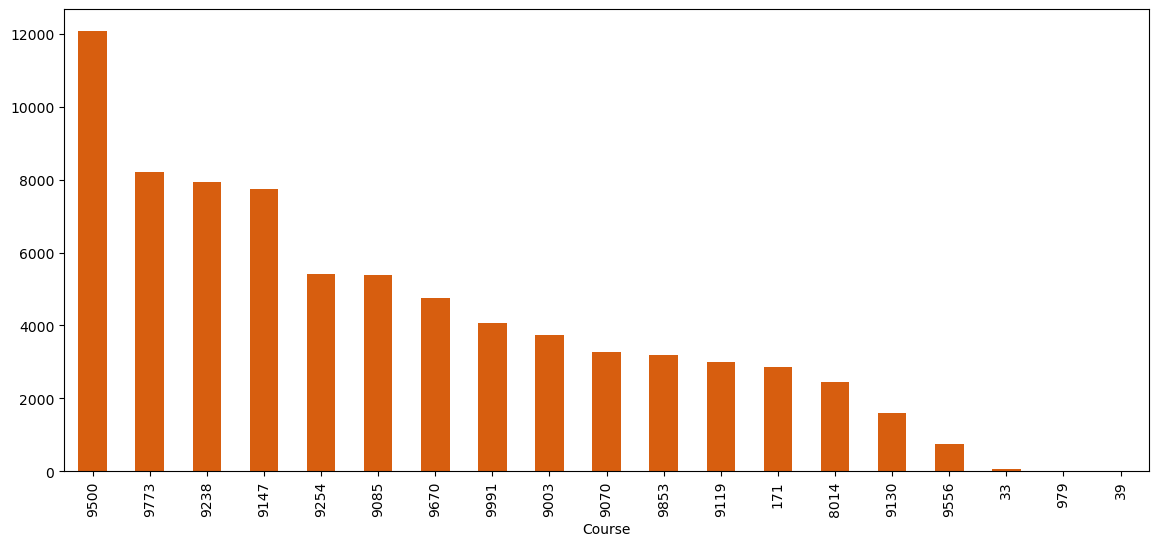

In [17]:
df_train['Course'].value_counts().plot(kind='bar', figsize=(14, 6), color='#D75E0F')

<hr/>



<h3 style="color: #92B24B;">Daytime/evening attendance</h3>

<ul>
  <li style="color: #0E66AD; font-weight: bold;">
    <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">1 -</span> Daytime
  </li>
  <li style="color: #0E66AD; font-weight: bold;">
    <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">0 -</span> Evening
  </li>
</ul>

In [18]:
df_train['Daytime/evening attendance'].value_counts()

Daytime/evening attendance
1    70038
0     6480
Name: count, dtype: int64

<Axes: ylabel='count'>

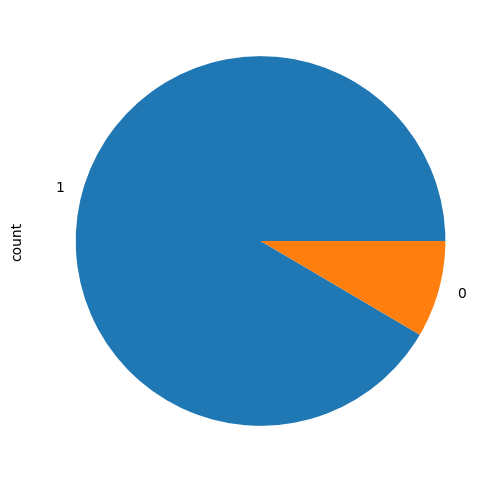

In [19]:
df_train['Daytime/evening attendance'].value_counts().plot(kind='pie', figsize=(14, 6))

<hr/>


<h3 style="color: #92B24B;">Previous qualification</h3>

<ul> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">1 -</span> Secondary education </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">2 -</span> Higher education - bachelor's degree </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">3 -</span> Higher education - degree </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">4 -</span> Higher education - master's </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">5 -</span> Higher education - doctorate </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">6 -</span> Frequency of higher education </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">9 -</span> 12th year of schooling - not completed </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">10 -</span> 11th year of schooling - not completed </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">12 -</span> Other - 11th year of schooling </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">14 -</span> 10th year of schooling </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">15 -</span> 10th year of schooling - not completed </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">19 -</span> Basic education 3rd cycle (9th/10th/11th year) or equiv. </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">38 -</span> Basic education 2nd cycle (6th/7th/8th year) or equiv. </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">39 -</span> Technological specialization course </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">40 -</span> Higher education - degree (1st cycle) </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">42 -</span> Professional higher technical course </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">43 -</span> Higher education - master (2nd cycle) </li> </ul>

<hr/>



<h3 style="color: #92B24B;">Previous qualification (grade)</h3>


<li style="color: #0E66AD; font-weight: bold;">Grade of previous qualification (between 0 and 200)</li>

<hr/>

<h3 style="color: #92B24B;">Nacionality</h3>

<ul> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">1 -</span> Portuguese </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">2 -</span> German </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">6 -</span> Spanish </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">11 -</span> Italian </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">13 -</span> Dutch </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">14 -</span> English </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">17 -</span> Lithuanian </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">21 -</span> Angolan </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">22 -</span> Cape Verdean </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">24 -</span> Guinean </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">25 -</span> Mozambican </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">26 -</span> Santomean </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">32 -</span> Turkish </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">41 -</span> Brazilian </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">62 -</span> Romanian </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">100 -</span> Moldova (Republic of) </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">101 -</span> Mexican </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">103 -</span> Ukrainian </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">105 -</span> Russian </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">108 -</span> Cuban </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">109 -</span> Colombian </li> </ul>

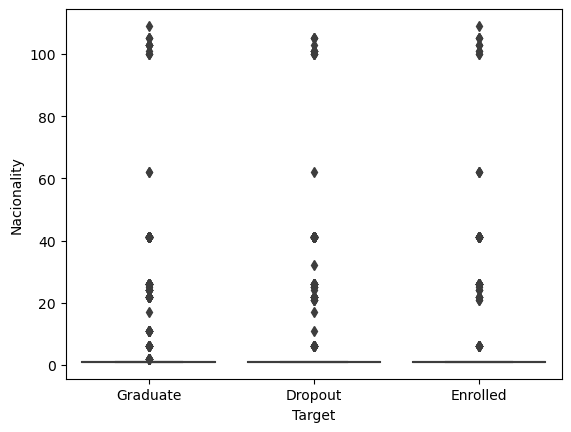

In [79]:
sns.boxplot(y='Nacionality', x='Target',data=df_train)
plt.show()

<hr/>

<h3 style="color: #92B24B;">Mother's qualification</h3>

<ul> 
    <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">1 -</span> Secondary Education - 12th Year of Schooling or Eq. </li> 
    <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">2 -</span> Higher Education - Bachelor's Degree </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">3 -</span> Higher Education - Degree </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">4 -</span> Higher Education - Master's </li> 
    <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">5 -</span> Higher Education - Doctorate </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">6 -</span> Frequency of Higher Education </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">9 -</span> 12th Year of Schooling - Not Completed </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">10 -</span> 11th Year of Schooling - Not Completed </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">11 -</span> 7th Year (Old) </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">12 -</span> Other - 11th Year of Schooling </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">14 -</span> 10th Year of Schooling </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">18 -</span> General commerce course </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">19 -</span> Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv. </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">22 -</span> Technical-professional course </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">26 -</span> 7th year of schooling </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">27 -</span> 2nd cycle of the general high school course </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">29 -</span> 9th Year of Schooling - Not Completed </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">30 -</span> 8th year of schooling </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">34 -</span> Unknown </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">35 -</span> Can't read or write </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">36 -</span> Can read without having a 4th year of schooling </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">37 -</span> Basic education 1st cycle (4th/5th year) or equiv. </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">38 -</span> Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv. </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">39 -</span> Technological specialization course </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">40 -</span> Higher education - degree (1st cycle) </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">41 -</span> Specialized higher studies course </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">42 -</span> Professional higher technical course </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">43 -</span> Higher Education - Master (2nd cycle) </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">44 -</span> Higher Education - Doctorate (3rd cycle)
</ul>

<hr/>

<h3 style="color: #92B24B;">Father's qualification</h3>

<ul> 
    <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">1 -</span> Secondary Education - 12th Year of Schooling or Eq. </li> 
    <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">2 -</span> Higher Education - Bachelor's Degree </li> 
    <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">3 -</span> Higher Education - Degree </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">4 -</span> Higher Education - Master's </li> 
    <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">5 -</span> Higher Education - Doctorate </li> 
    <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">6 -</span> Frequency of Higher Education </li> 
    <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">9 -</span> 12th Year of Schooling - Not Completed </li> 
    <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">10 -</span> 11th Year of Schooling - Not Completed </li> 
    <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">11 -</span> 7th Year (Old) </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">12 -</span> Other - 11th Year of Schooling </li> 
    <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">14 -</span> 10th Year of Schooling </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">18 -</span> General commerce course </li> 
    <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">19 -</span> Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv. </li> 
    <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">22 -</span> Technical-professional course </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">26 -</span> 7th year of schooling </li> 
    <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">27 -</span> 2nd cycle of the general high school course </li> 
    <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">29 -</span> 9th Year of Schooling - Not Completed </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">30 -</span> 8th year of schooling </li> 
    <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">34 -</span> Unknown </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">35 -</span> Can't read or write </li> 
    <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">36 -</span> Can read without having a 4th year of schooling </li> 
    <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">37 -</span> Basic education 1st cycle (4th/5th year) or equiv. </li> 
    <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">38 -</span> Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv. </li> 
    <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">39 -</span> Technological specialization course </li> 
    <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">40 -</span> Higher education - degree (1st cycle) </li> 
    <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">41 -</span> Specialized higher studies course </li> 
    <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">42 -</span> Professional higher technical course </li> 
    <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">43 -</span> Higher Education - Master (2nd cycle) </li> 
    <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">44 -</span> Higher Education - Doctorate (3rd cycle) 
</ul>

<hr/>

<h3 style="color: #92B24B;">Mother's occupation</h3>

<ul> 
<li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">0 -</span> Student </li> 
<li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">1 -</span> Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers </li> 
<li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">2 -</span> Specialists in Intellectual and Scientific Activities </li> 
<li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">3 -</span> Intermediate Level Technicians and Professions </li> 
<li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">4 -</span> Administrative staff </li> 
<li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">5 -</span> Personal Services, Security and Safety Workers and Sellers </li> 
<li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">6 -</span> Farmers and Skilled Workers in Agriculture, Fisheries and Forestry </li> 
<li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">7 -</span> Skilled Workers in Industry, Construction and Craftsmen </li> 
<li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">8 -</span> Installation and Machine Operators and Assembly Workers </li> 
<li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">9 -</span> Unskilled Workers </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">10 -</span> Armed Forces Professions </li> 
<li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">90 -</span> Other Situation </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">99 -</span> (blank) </li> 
<li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">122 -</span> Health professionals </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">123 -</span> teachers </li> 
<li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">125 -</span> Specialists in information and communication technologies (ICT) </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">131 -</span> Intermediate level science and engineering technicians and professions </li> 
<li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">132 -</span> Technicians and professionals, of intermediate level of health </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">134 -</span> Intermediate level technicians from legal, social, sports, cultural and similar services </li> 
<li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">141 -</span> Office workers, secretaries in general and data processing operators </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">143 -</span> Data, accounting, statistical, financial services and registry-related operators </li> 
<li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">144 -</span> Other administrative support staff </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">151 -</span> personal service workers </li> 
<li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">152 -</span> sellers </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">153 -</span> Personal care workers and the like </li> 
<li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">171 -</span> Skilled construction workers and the like, except electricians </li> <li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">173 -</span> Skilled workers in printing, precision instrument manufacturing, jewelers, artisans and the like </li> 
<li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">175 -</span> Workers in food processing, woodworking, clothing and other industries and crafts </li> 
<li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">191 -</span> cleaning workers </li> 
<li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">192 -</span> Unskilled workers in agriculture, animal production, fisheries and forestry </li> 
<li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">193 -</span> Unskilled workers in extractive industry, construction, manufacturing and transport </li> 
<li style="color: #0E66AD; font-weight: bold;"> <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">194 -</span> Meal preparation assistants </li> 

</ul>

<hr/>

<h3 style="color: #92B24B;">Father's occupation</h3>

<ul> <li>0 - Student</li> <li>1 - Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers</li> <li>2 - Specialists in Intellectual and Scientific Activities</li> <li>3 - Intermediate Level Technicians and Professions</li> <li>4 - Administrative staff</li> <li>5 - Personal Services, Security and Safety Workers and Sellers</li> <li>6 - Farmers and Skilled Workers in Agriculture, Fisheries and Forestry</li> <li>7 - Skilled Workers in Industry, Construction and Craftsmen</li> <li>8 - Installation and Machine Operators and Assembly Workers</li> <li>9 - Unskilled Workers</li> <li>10 - Armed Forces Professions</li> <li>90 - Other Situation</li> <li>99 - (blank)</li> <li>101 - Armed Forces Officers</li> <li>102 - Armed Forces Sergeants</li> <li>103 - Other Armed Forces personnel</li> <li>112 - Directors of administrative and commercial services</li> <li>114 - Hotel, catering, trade and other services directors</li> <li>121 - Specialists in the physical sciences, mathematics, engineering and related techniques</li> <li>122 - Health professionals</li> <li>123 - teachers</li> <li>124 - Specialists in finance, accounting, administrative organization, public and commercial relations</li> <li>131 - Intermediate level science and engineering technicians and professions</li> <li>132 - Technicians and professionals, of intermediate level of health</li> <li>134 - Intermediate level technicians from legal, social, sports, cultural and similar services</li> <li>135 - Information and communication technology technicians</li> <li>141 - Office workers, secretaries in general and data processing operators</li> <li>143 - Data, accounting, statistical, financial services and registry-related operators</li> <li>144 - Other administrative support staff</li> <li>151 - personal service workers</li> <li>152 - sellers</li> <li>153 - Personal care workers and the like</li> <li>154 - Protection and security services personnel</li> <li>161 - Market-oriented farmers and skilled agricultural and animal production workers</li> <li>163 - Farmers, livestock keepers, fishermen, hunters and gatherers, subsistence</li> <li>171 - Skilled construction workers and the like, except electricians</li> <li>172 - Skilled workers in metallurgy, metalworking and similar</li> <li>174 - Skilled workers in electricity and electronics</li> <li>175 - Workers in food processing, woodworking, clothing and other industries and crafts</li> <li>181 - Fixed plant and machine operators</li> <li>182 - assembly workers</li> <li>183 - Vehicle drivers and mobile equipment operators</li> <li>192 - Unskilled workers in agriculture, animal production, fisheries and forestry</li> <li>193 - Unskilled workers in extractive industry, construction, manufacturing and transport</li> <li>194 - Meal preparation assistants</li> <li>195 - Street vendors (except food) and street service providers</li> </ul>

<hr/>

<h3 style="color: #92B24B;">Admission grade</h3>

<li style="color: #0E66AD; font-weight: bold;">Admission grade (between 0 and 200)</li>

In [20]:
df_train['Admission grade'].value_counts()

Admission grade
120.0    2995
130.0    2704
140.0    2623
100.0    1683
110.0    1482
         ... 
149.1       1
164.7       1
111.2       1
178.6       1
165.9       1
Name: count, Length: 668, dtype: int64

In [21]:
df_train[['Admission grade', 'Target']]

,Admission grade,Target
0,122.6,Graduate
1,119.8,Dropout
2,144.7,Dropout
3,126.1,Enrolled
4,120.1,Graduate
...,...,...
76513,116.5,Graduate
76514,131.6,Graduate
76515,123.3,Enrolled
76516,124.8,Dropout


<Axes: title={'center': 'Admission grade'}, xlabel='[Target]'>

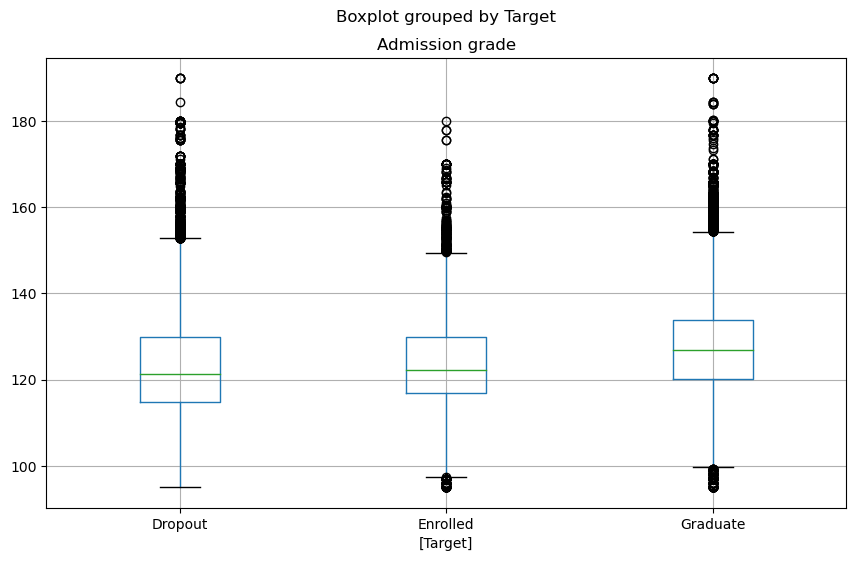

In [22]:
df_train[['Admission grade', 'Target']].boxplot(by='Target', figsize=(10, 6))

In [23]:
print('The mean of is: Admission grade', df_train['Admission grade'].mean())
print('The min of is: Admission grade', df_train['Admission grade'].min())
print('The max of is: Admission grade', df_train['Admission grade'].max())

The mean of is: Admission grade 125.36397139281887
The min of is: Admission grade 95.0
The max of is: Admission grade 190.0


In [24]:
print('Number of students who Graduated and have Admission grade more than the mean or equal it (125.0) is: ', df_train.loc[(pd.to_numeric(df_train['Admission grade']) >= 125.0) & (df_train['Target'] == 'Graduate')].shape[0])
print('Number of students who Enrolled and have Admission grade more than the mean or equal it (125.0) is: ', df_train.loc[(pd.to_numeric(df_train['Admission grade']) >= 125.0) & (df_train['Target'] == 'Enrolled')].shape[0] )
print('Number of students who Dropout and have Admission grade more than the mean or equal it (125.0) is: ', df_train.loc[(pd.to_numeric(df_train['Admission grade']) >= 125.0) & (df_train['Target'] == 'Dropout')].shape[0] )


Number of students who Graduated and have Admission grade more than the mean or equal it (125.0) is:  21288
Number of students who Enrolled and have Admission grade more than the mean or equal it (125.0) is:  5845
Number of students who Dropout and have Admission grade more than the mean or equal it (125.0) is:  10475


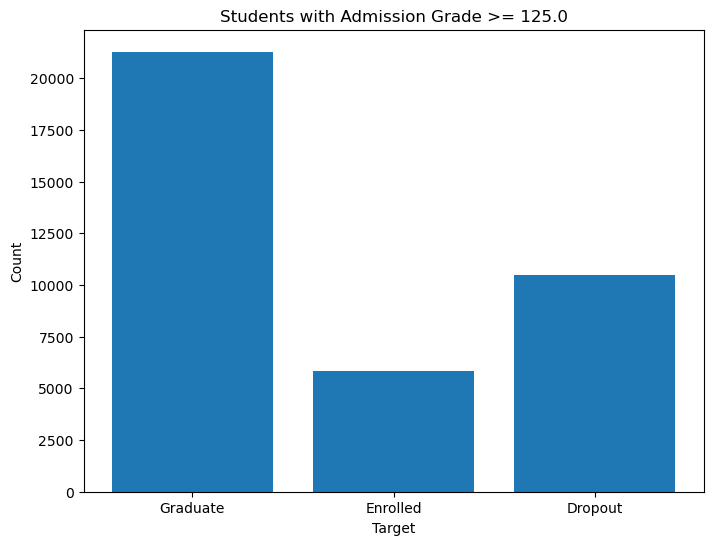

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your DataFrame is named 'df_train'
df_train['Admission grade'] = pd.to_numeric(df_train['Admission grade'])

# Calculate the counts
graduate_count = df_train.loc[(df_train['Admission grade'] >= 125.0) & (df_train['Target'] == 'Graduate')].shape[0]
enrolled_count = df_train.loc[(df_train['Admission grade'] >= 125.0) & (df_train['Target'] == 'Enrolled')].shape[0]
dropout_count = df_train.loc[(df_train['Admission grade'] >= 125.0) & (df_train['Target'] == 'Dropout')].shape[0]

# Create the bar chart
fig, ax = plt.subplots(figsize=(8, 6))
x = ['Graduate', 'Enrolled', 'Dropout']
y = [graduate_count, enrolled_count, dropout_count]
ax.bar(x, y)

# Add labels and title
ax.set_xlabel('Target')
ax.set_ylabel('Count')
ax.set_title('Students with Admission Grade >= 125.0')

# Display the chart
plt.show()

In [26]:
print('Number of students who Graduated and have Admission grade less than the mean or equal it (125.0) is: ', df_train.loc[(pd.to_numeric(df_train['Admission grade']) <= 125.0) & (df_train['Target'] == 'Graduate')].shape[0])
print('Number of students who Enrolled and have Admission grade less than the mean or equal it (125.0) is: ', df_train.loc[(pd.to_numeric(df_train['Admission grade']) <= 125.0) & (df_train['Target'] == 'Enrolled')].shape[0] )
print('Number of students who Dropout and have Admission grade less than the mean or equal it (125.0) is: ', df_train.loc[(pd.to_numeric(df_train['Admission grade']) <= 125.0) & (df_train['Target'] == 'Dropout')].shape[0] )


Number of students who Graduated and have Admission grade less than the mean or equal it (125.0) is:  15239
Number of students who Enrolled and have Admission grade less than the mean or equal it (125.0) is:  9217
Number of students who Dropout and have Admission grade less than the mean or equal it (125.0) is:  14921


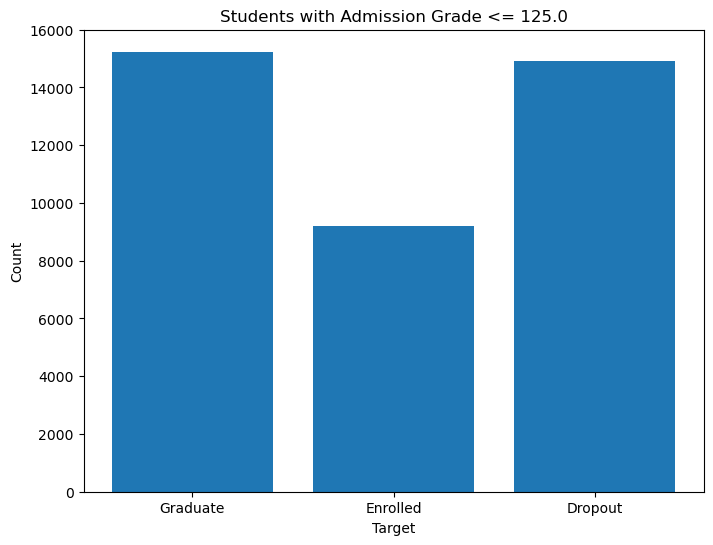

In [27]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your DataFrame is named 'df_train'
df_train['Admission grade'] = pd.to_numeric(df_train['Admission grade'])

# Calculate the counts
graduate_count = df_train.loc[(df_train['Admission grade'] <= 125.0) & (df_train['Target'] == 'Graduate')].shape[0]
enrolled_count = df_train.loc[(df_train['Admission grade'] <= 125.0) & (df_train['Target'] == 'Enrolled')].shape[0]
dropout_count = df_train.loc[(df_train['Admission grade'] <= 125.0) & (df_train['Target'] == 'Dropout')].shape[0]

# Create the bar chart
fig, ax = plt.subplots(figsize=(8, 6))
x = ['Graduate', 'Enrolled', 'Dropout']
y = [graduate_count, enrolled_count, dropout_count]
ax.bar(x, y)

# Add labels and title
ax.set_xlabel('Target')
ax.set_ylabel('Count')
ax.set_title('Students with Admission Grade <= 125.0')

# Display the chart
plt.show()

In [28]:
print('Number of students who Graduated and have Admission grade less than the min or equal it (95.0) is: ', df_train.loc[(pd.to_numeric(df_train['Admission grade']) <= 95.0) & (df_train['Target'] == 'Graduate')].shape[0])
print('Number of students who Enrolled and have Admission grade less than the min or equal it (95.0) is: ', df_train.loc[(pd.to_numeric(df_train['Admission grade']) <= 95.0) & (df_train['Target'] == 'Enrolled')].shape[0] )
print('Number of students who Dropout and have Admission grade less than the min or equal it (95.0) is: ', df_train.loc[(pd.to_numeric(df_train['Admission grade']) <= 95.0) & (df_train['Target'] == 'Dropout')].shape[0] )

Number of students who Graduated and have Admission grade less than the min or equal it (95.0) is:  61
Number of students who Enrolled and have Admission grade less than the min or equal it (95.0) is:  37
Number of students who Dropout and have Admission grade less than the min or equal it (95.0) is:  196


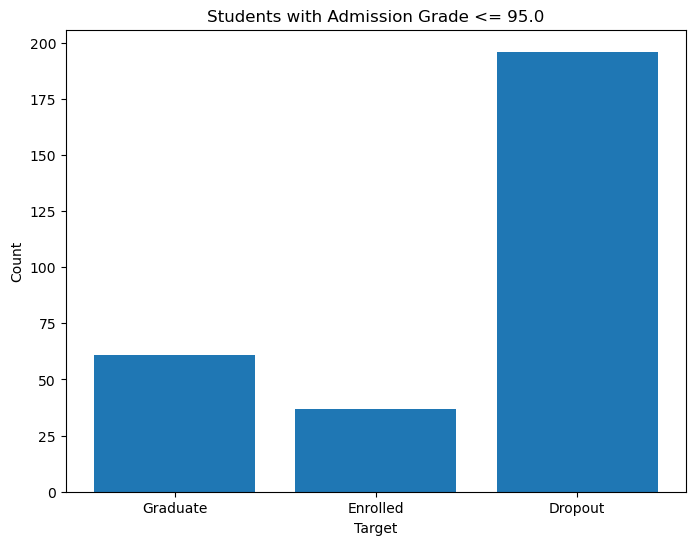

In [29]:

df_train['Admission grade'] = pd.to_numeric(df_train['Admission grade'])

# Calculate the counts
graduate_count = df_train.loc[(df_train['Admission grade'] <= 95.0) & (df_train['Target'] == 'Graduate')].shape[0]
enrolled_count = df_train.loc[(df_train['Admission grade'] <= 95.0) & (df_train['Target'] == 'Enrolled')].shape[0]
dropout_count = df_train.loc[(df_train['Admission grade'] <= 95.0) & (df_train['Target'] == 'Dropout')].shape[0]

# Create the bar chart
fig, ax = plt.subplots(figsize=(8, 6))
x = ['Graduate', 'Enrolled', 'Dropout']
y = [graduate_count, enrolled_count, dropout_count]
ax.bar(x, y)

# Add labels and title
ax.set_xlabel('Target')
ax.set_ylabel('Count')
ax.set_title('Students with Admission Grade <= 95.0')

# Display the chart
plt.show()

<hr/>

<h3 style="color: #92B24B;">Displaced</h3>

<ul>
  <li style="color: #0E66AD; font-weight: bold;">
    <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">1 -</span> yes
  </li>
  <li style="color: #0E66AD; font-weight: bold;">
    <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">0 -</span> no
  </li>
</ul>


<Axes: ylabel='count'>

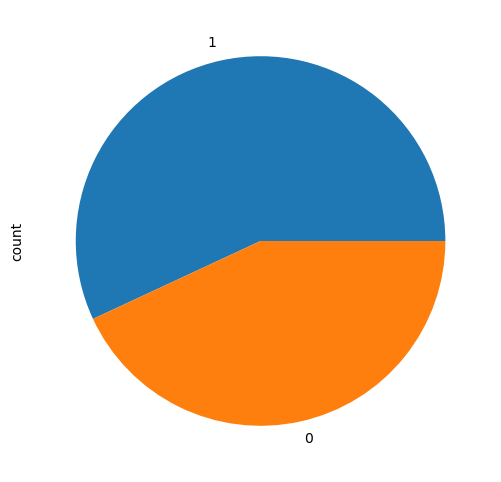

In [30]:
df_train['Displaced'].value_counts().plot(kind='pie', figsize=(14, 6))

In [31]:
enrolled_displaced = df_train.loc[df_train['Target'] == 'Enrolled', 'Displaced'].value_counts()
dropout_displaced = df_train.loc[df_train['Target'] == 'Dropout', 'Displaced'].value_counts()
graduate_displaced = df_train.loc[df_train['Target'] == 'Graduate', 'Displaced'].value_counts()


data = {
    'Enrolled': enrolled_displaced,
    'Dropout': dropout_displaced,
    'Graduate': graduate_displaced
}

df = pd.DataFrame(data)


df

,Enrolled,Dropout,Graduate
Displaced,,,
0,6400,13431,13128
1,8540,11865,23154


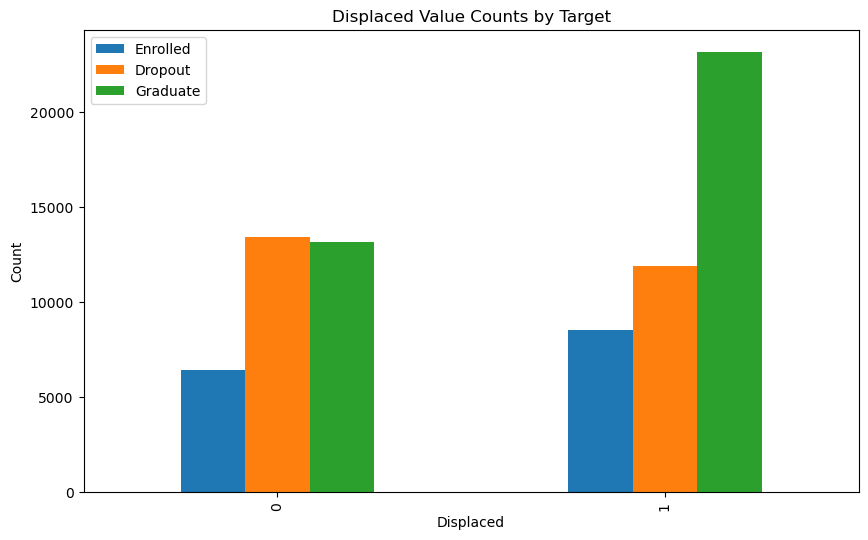

In [32]:
df.plot(kind='bar',  figsize=(10, 6))


plt.xlabel('Displaced')
plt.ylabel('Count')
plt.title('Displaced Value Counts by Target')

plt.show()

<hr/>

<h3 style="color: #92B24B;">Educational special needs</h3>

<ul>
  <li style="color: #0E66AD; font-weight: bold;">
    <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">1 -</span> yes
  </li>
  <li style="color: #0E66AD; font-weight: bold;">
    <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">0 -</span> no
  </li>
</ul>

In [33]:
df_train['Educational special needs'].value_counts()

Educational special needs
0    76232
1      286
Name: count, dtype: int64

<Axes: xlabel='Educational special needs'>

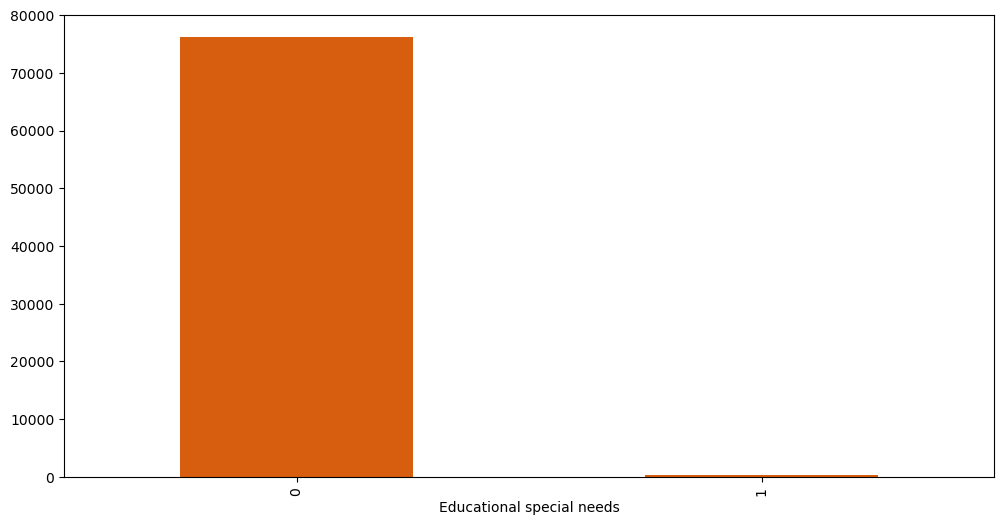

In [34]:
df_train['Educational special needs'].value_counts().plot(kind='bar', figsize=(12, 6), color='#D75E0F')

In [35]:

graduate_edu_needs = df_train.loc[df_train['Target'] == 'Graduate', 'Educational special needs'].value_counts()
enrolled_edu_needs = df_train.loc[df_train['Target'] == 'Enrolled', 'Educational special needs'].value_counts()
dropout_edu_needs = df_train.loc[df_train['Target'] == 'Dropout', 'Educational special needs'].value_counts()


data2 = {
    'Graduate': graduate_edu_needs,
    'Enrolled': enrolled_edu_needs,
    'Dropout': dropout_edu_needs
}

df2 = pd.DataFrame(data2)


df2

,Graduate,Enrolled,Dropout
Educational special needs,,,
0,36149,14881,25202
1,133,59,94


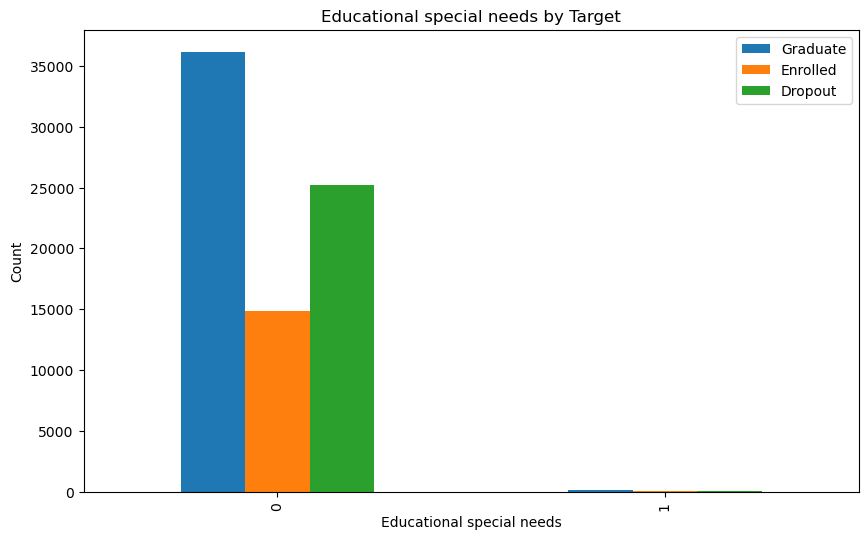

In [36]:
df2.plot(kind='bar',  figsize=(10, 6))


plt.xlabel('Educational special needs')
plt.ylabel('Count')
plt.title('Educational special needs by Target')

plt.show()

<hr/>

<h3 style="color: #92B24B;">Debtor</h3>

<ul>
  <li style="color: #0E66AD; font-weight: bold;">
    <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">1 -</span> yes
  </li>
  <li style="color: #0E66AD; font-weight: bold;">
    <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">0 -</span> no
  </li>
</ul>

In [37]:
df_train['Debtor'].value_counts()

Debtor
0    71056
1     5462
Name: count, dtype: int64

<Axes: ylabel='count'>

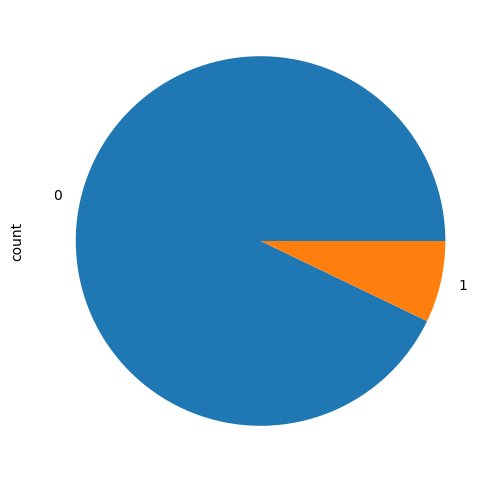

In [38]:
df_train['Debtor'].value_counts().plot(kind='pie', figsize=(6,6))

In [39]:
graduate_debtor = df_train.loc[df_train['Target'] == 'Graduate', 'Debtor'].value_counts()
enrolled_debtor = df_train.loc[df_train['Target'] == 'Enrolled', 'Debtor'].value_counts()
dropout_debtor = df_train.loc[df_train['Target'] == 'Dropout', 'Debtor'].value_counts()


data3 = {
    'Graduate': graduate_debtor,
    'Enrolled': enrolled_debtor,
    'Dropout': dropout_debtor
}
df3 = pd.DataFrame(data3)

df3

,Graduate,Enrolled,Dropout
Debtor,,,
0,35652,14287,21117
1,630,653,4179


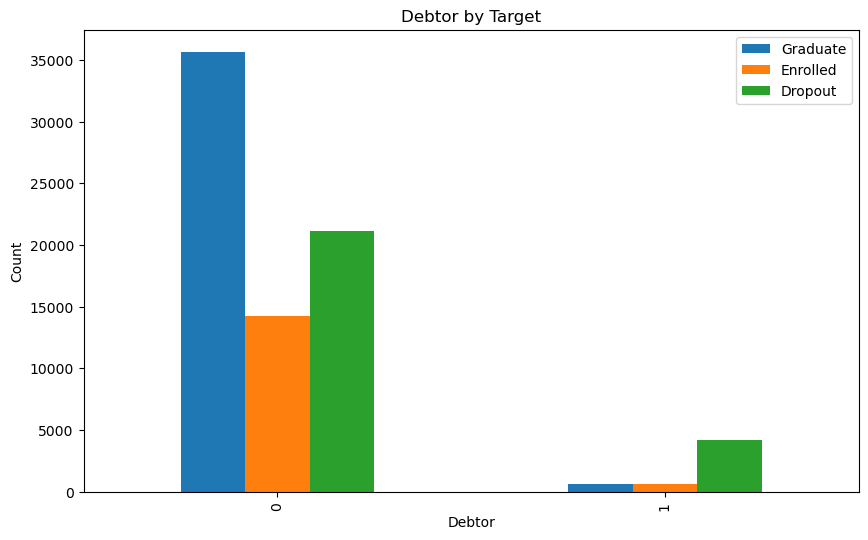

In [40]:
df3.plot(kind='bar',  figsize=(10, 6))


plt.xlabel('Debtor')
plt.ylabel('Count')
plt.title('Debtor by Target')

plt.show()

<hr/>

<h3 style="color: #92B24B;">Tuition fees up to date</h3>

<ul>
  <li style="color: #0E66AD; font-weight: bold;">
    <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">1 -</span> yes
  </li>
  <li style="color: #0E66AD; font-weight: bold;">
    <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">0 -</span> no
  </li>
</ul>

In [41]:
df_train['Tuition fees up to date'].value_counts()

Tuition fees up to date
1    68380
0     8138
Name: count, dtype: int64

In [42]:

graduate_tuition_fees = df_train.loc[df_train['Target'] == 'Graduate', 'Tuition fees up to date'].value_counts()
enrolled_tuition_fees = df_train.loc[df_train['Target'] == 'Enrolled', 'Tuition fees up to date'].value_counts()
dropout_tuition_fees = df_train.loc[df_train['Target'] == 'Dropout', 'Tuition fees up to date'].value_counts()


data4 = {
    'Graduate': graduate_tuition_fees,
    'Enrolled': enrolled_tuition_fees,
    'Dropout': dropout_tuition_fees
}

df4 = pd.DataFrame(data4)

df4

,Graduate,Enrolled,Dropout
Tuition fees up to date,,,
1,36152,14577,17651
0,130,363,7645


<hr/>

<h3 style="color: #92B24B;">Gender</h3>

<ul>
  <li style="color: #0E66AD; font-weight: bold;">
    <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">1 -</span> male
  </li>
  <li style="color: #0E66AD; font-weight: bold;">
    <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">0 -</span> female
  </li>
</ul>

<Axes: xlabel='Gender'>

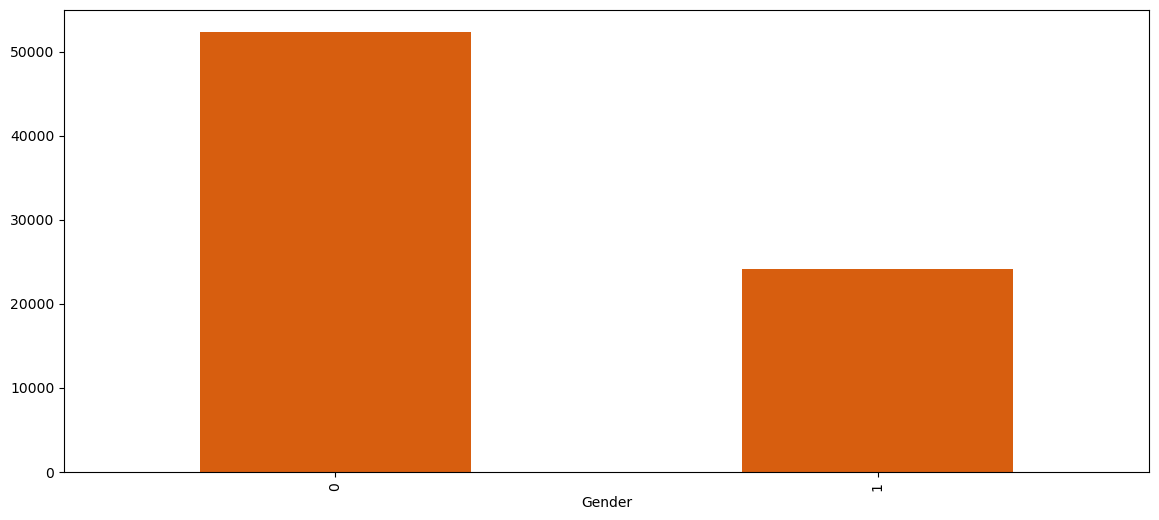

In [43]:
df_train['Gender'].value_counts().plot(kind='bar',figsize=(14,6), color='#D75E0F')

In [44]:

graduate_gender = df_train.loc[df_train['Target'] == 'Graduate', 'Gender'].value_counts()
enrolled_gender = df_train.loc[df_train['Target'] == 'Enrolled', 'Gender'].value_counts()
dropout_gender = df_train.loc[df_train['Target'] == 'Dropout', 'Gender'].value_counts()


data5 = {
    'Graduate': graduate_gender,
    'Enrolled': enrolled_gender,
    'Dropout': dropout_gender
}
df5 = pd.DataFrame(data5)

df5

,Graduate,Enrolled,Dropout
Gender,,,
0,30232,9804,12316
1,6050,5136,12980


<hr/>

<h3 style="color: #92B24B;">Scholarship holder</h3>

<ul>
  <li style="color: #0E66AD; font-weight: bold;">
    <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">1 -</span> yes
  </li>
  <li style="color: #0E66AD; font-weight: bold;">
    <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">0 -</span> no
  </li>
</ul>

In [45]:
df_train['Scholarship holder'].value_counts()

Scholarship holder
0    57588
1    18930
Name: count, dtype: int64

<Axes: ylabel='count'>

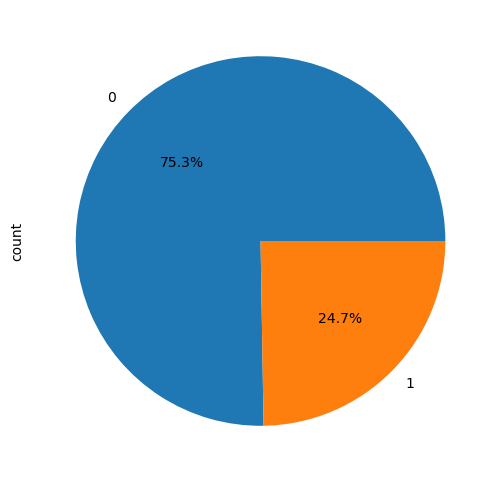

In [46]:
df_train['Scholarship holder'].value_counts().plot(kind='pie',autopct='%1.1f%%', figsize=(6,6))

In [47]:

graduate_scholarship = df_train.loc[df_train['Target'] == 'Graduate','Scholarship holder'].value_counts()
enrolled_scholarship = df_train.loc[df_train['Target'] == 'Enrolled', 'Scholarship holder'].value_counts()
dropout_scholarship = df_train.loc[df_train['Target'] == 'Dropout', 'Scholarship holder'].value_counts()


data6 = {
    'Graduate': graduate_scholarship,
    'Enrolled': enrolled_scholarship,
    'Dropout': dropout_scholarship
}
df6 = pd.DataFrame(data6)

df6

,Graduate,Enrolled,Dropout
Scholarship holder,,,
0,20692,12949,23947
1,15590,1991,1349


<hr/>


<h3 style="color: #92B24B;"> Age at enrollment</h3>


<li style="color: #0E66AD; font-weight: bold;">Age of studend at enrollment</li>

<Axes: >

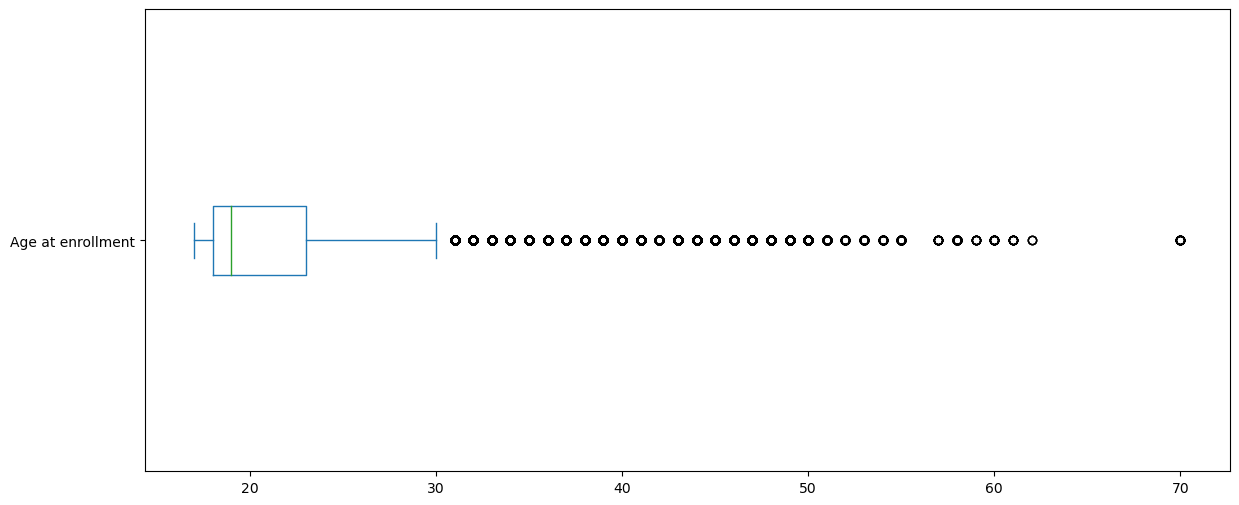

In [48]:
df_train['Age at enrollment'].plot(kind='box', vert=False, figsize=(14,6))

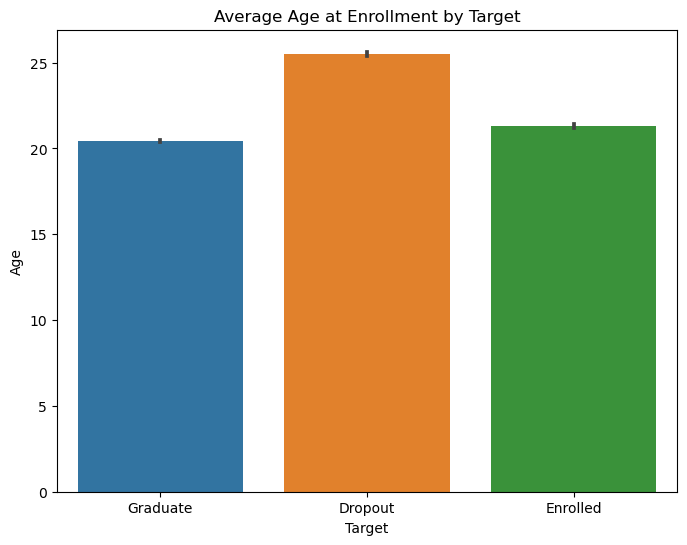

In [49]:

plt.figure(figsize=(8, 6))
sns.barplot(x='Target', y='Age at enrollment', data=df_train)
plt.title('Average Age at Enrollment by Target')
plt.xlabel('Target')
plt.ylabel('Age')
plt.show()

In [50]:
print('The mean of Age at enrollemnt is: ', df_train['Age at enrollment'].mean())
print('The min of Age at enrollemnt is: ', df_train['Age at enrollment'].min())
print('The max of Age at enrollemnt is: ', df_train['Age at enrollment'].max())

The mean of Age at enrollemnt is:  22.27865338874513
The min of Age at enrollemnt is:  17
The max of Age at enrollemnt is:  70


In [51]:
print('The number of students who enrolled at the age 17 is: ', df_train.loc[(df_train['Age at enrollment'] == df_train['Age at enrollment'].min())].shape[0])
print('The number of students who enrolled at the age 70 is: ', df_train.loc[(df_train['Age at enrollment'] == df_train['Age at enrollment'].max())].shape[0])
print('The number of students who enrolled at the age between more than 17 and less than 70: ', df_train.loc[(df_train['Age at enrollment'] > 17) & (df_train['Age at enrollment'] < 70)].shape[0])

The number of students who enrolled at the age 17 is:  40
The number of students who enrolled at the age 70 is:  20
The number of students who enrolled at the age between more than 17 and less than 70:  76458


In [52]:
people_ages = [
    {'Age Group': 'Young', 'Age Range': '18 - 30', 'Count': df_train.loc[(df_train['Age at enrollment'] > 17) & (df_train['Age at enrollment'] <= 30)].shape[0]},
    {'Age Group': 'Middle-aged', 'Age Range': '31 - 60', 'Count': df_train.loc[(df_train['Age at enrollment'] > 30) & (df_train['Age at enrollment'] <= 60)].shape[0]},
    {'Age Group': 'Older', 'Age Range': '61 - 70', 'Count': df_train.loc[(df_train['Age at enrollment'] > 60) & (df_train['Age at enrollment'] <= 70)].shape[0]}
]

age_df = pd.DataFrame(people_ages)
age_df

,Age Group,Age Range,Count
0,Young,18 - 30,67543
1,Middle-aged,31 - 60,8902
2,Older,61 - 70,33


<Figure size 800x600 with 0 Axes>

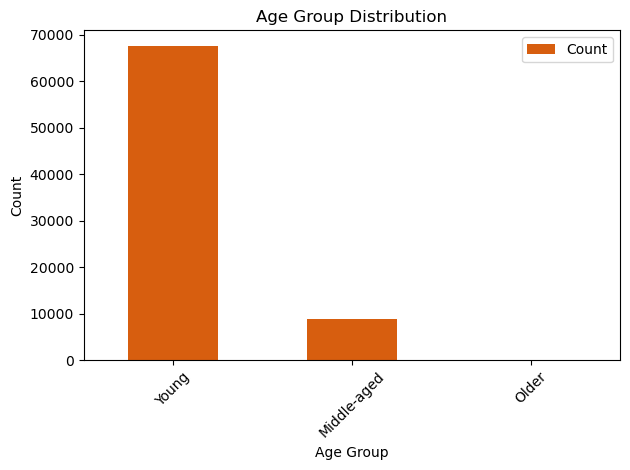

In [53]:

plt.figure(figsize=(8, 6))
age_df.plot(x='Age Group', y='Count', kind='bar', color='#D75E0F')
plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [54]:
people = [
    {'Age Group': 'Young (18-30)', 'Graduate': df_train.loc[(df_train['Age at enrollment'] > 17) & (df_train['Age at enrollment'] <= 30) & (df_train['Target'] == 'Graduate')].shape[0],
     'Enrolled': df_train.loc[(df_train['Age at enrollment'] > 17) & (df_train['Age at enrollment'] <= 30) & (df_train['Target'] == 'Enrolled')].shape[0],
     'Dropout': df_train.loc[(df_train['Age at enrollment'] > 17) & (df_train['Age at enrollment'] <= 30) & (df_train['Target'] == 'Dropout')].shape[0]},
    {'Age Group': 'Middle-aged (31-60)', 'Graduate': df_train.loc[(df_train['Age at enrollment'] > 30) & (df_train['Age at enrollment'] <= 60) & (df_train['Target'] == 'Graduate')].shape[0],
     'Enrolled': df_train.loc[(df_train['Age at enrollment'] > 30) & (df_train['Age at enrollment'] <= 60) & (df_train['Target'] == 'Enrolled')].shape[0],
     'Dropout': df_train.loc[(df_train['Age at enrollment'] > 30) & (df_train['Age at enrollment'] <= 60) & (df_train['Target'] == 'Dropout')].shape[0]},
    {'Age Group': 'Older (61-70)', 'Graduate': df_train.loc[(df_train['Age at enrollment'] > 60) & (df_train['Age at enrollment'] <= 70) & (df_train['Target'] == 'Graduate')].shape[0],
     'Enrolled': df_train.loc[(df_train['Age at enrollment'] > 60) & (df_train['Age at enrollment'] <= 70) & (df_train['Target'] == 'Enrolled')].shape[0],
     'Dropout': df_train.loc[(df_train['Age at enrollment'] > 60) & (df_train['Age at enrollment'] <= 70) & (df_train['Target'] == 'Dropout')].shape[0]}
]

age_target_df = pd.DataFrame(people)
age_target_df

,Age Group,Graduate,Enrolled,Dropout
0,Young (18-30),34189,13842,19512
1,Middle-aged (31-60),2060,1093,5749
2,Older (61-70),1,1,31


In [55]:
df_17 = pd.DataFrame({
    'Age at enrollment': [17, 17, 17],
    'Target': ['Graduate', 'Enrolled', 'Dropout'],
    'Count': [
        df_train.loc[(df_train['Age at enrollment'] == 17) & (df_train['Target'] == 'Graduate')].shape[0],
        df_train.loc[(df_train['Age at enrollment'] == 17) & (df_train['Target'] == 'Enrolled')].shape[0],
        df_train.loc[(df_train['Age at enrollment'] == 17) & (df_train['Target'] == 'Dropout')].shape[0]
    ]
})

df_17

,Age at enrollment,Target,Count
0,17,Graduate,32
1,17,Enrolled,4
2,17,Dropout,4


In [56]:
df_70 = pd.DataFrame({
    'Age at enrollment': [70, 70, 70],
    'Target': ['Graduate', 'Enrolled', 'Dropout'],
    'Count': [
        df_train.loc[(df_train['Age at enrollment'] == 70) & (df_train['Target'] == 'Graduate')].shape[0],
        df_train.loc[(df_train['Age at enrollment'] == 70) & (df_train['Target'] == 'Enrolled')].shape[0],
        df_train.loc[(df_train['Age at enrollment'] == 70) & (df_train['Target'] == 'Dropout')].shape[0]
    ]
})

df_70

,Age at enrollment,Target,Count
0,70,Graduate,0
1,70,Enrolled,1
2,70,Dropout,19


<hr/>

<h3 style="color: #92B24B;">International</h3>

<ul>
  <li style="color: #0E66AD; font-weight: bold;">
    <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">1 -</span> yes
  </li>
  <li style="color: #0E66AD; font-weight: bold;">
    <span style="color:#D75E0F; font-size: 18px; font-weight: bold;">0 -</span> no
  </li>
</ul>

In [57]:
df_train['International'].value_counts()

International
0    76011
1      507
Name: count, dtype: int64

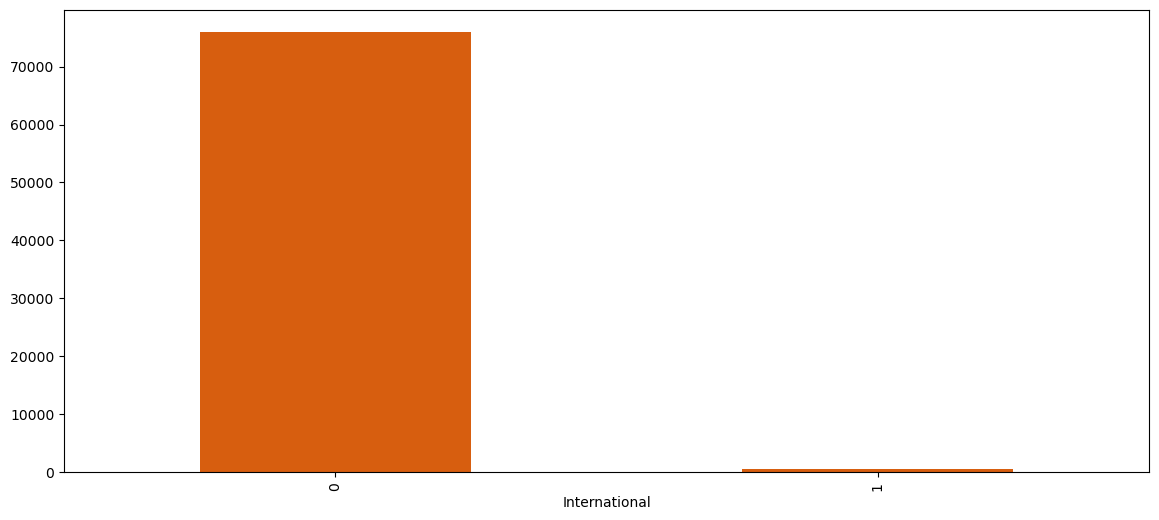

In [58]:
df_train['International'].value_counts().plot(kind='bar', color='#D75E0F', figsize=(14, 6))
plt.show()

In [59]:

international_counts = df_train['International'].value_counts()


international_percentages = (international_counts / international_counts.sum()) * 100


print(international_percentages)

International
0    99.337411
1     0.662589
Name: count, dtype: float64


In [60]:

graduate_counts = df_train.loc[df_train['Target'] == 'Graduate', 'International'].value_counts()
enrolled_counts = df_train.loc[df_train['Target'] == 'Enrolled', 'International'].value_counts()
dropout_counts = df_train.loc[df_train['Target'] == 'Dropout', 'International'].value_counts()

# Create the DataFrame
inter = pd.DataFrame({
    'Graduate': graduate_counts,
    'Enrolled': enrolled_counts,
    'Dropout': dropout_counts
})


inter

,Graduate,Enrolled,Dropout
International,,,
0,36039,14848,25124
1,243,92,172


<hr/>

<h3 style="color: #92B24B;">Curricular units 1st sem (credited)</h3>

<li style="color: #0E66AD; font-weight: bold;">Number of curricular units credited in the 1st semester</li>

<hr/>

<h3 style="color: #92B24B;">Curricular units 1st sem (enrolled)</h3>

<li style="color: #0E66AD; font-weight: bold;">Number of curricular units enrolled in the 1st semester</li>

<hr/>

<h3 style="color: #92B24B;">Curricular units 1st sem (evaluations)</h3>

<li style="color: #0E66AD; font-weight: bold;">Number of evaluations to curricular units in the 1st semester</li>

<hr/>

<h3 style="color: #92B24B;">Curricular units 1st sem (approved)</h3>

<li style="color: #0E66AD; font-weight: bold;">Number of curricular units approved in the 1st semester</li>

<hr/>

<h3 style="color: #92B24B;">Curricular units 1st sem (grade)</h3>

<li style="color: #0E66AD; font-weight: bold;">Grade average in the 1st semester (between 0 and 20)</li>

<hr/>

<h3 style="color: #92B24B;">Curricular units 1st sem (without evaluations)</h3>

<li style="color: #0E66AD; font-weight: bold;">Number of curricular units without evalutions in the 1st semester</li>

<hr/>

<h3 style="color: #92B24B;">Curricular units 2nd sem (credited)</h3>

<li style="color: #0E66AD; font-weight: bold;">Number of curricular units credited in the 2nd semester</li>

<hr/>

<h3 style="color: #92B24B;">Curricular units 2nd sem (enrolled)</h3>

<li style="color: #0E66AD; font-weight: bold;">Number of curricular units enrolled in the 2nd semester</li>

<hr/>

<h3 style="color: #92B24B;">Curricular units 2nd sem (evaluations)</h3>

<li style="color: #0E66AD; font-weight: bold;">Number of evaluations to curricular units in the 2nd semester</li>

<hr/>

<h3 style="color: #92B24B;">Curricular units 2nd sem (approved)</h3>

<li style="color: #0E66AD; font-weight: bold;">Number of curricular units approved in the 2nd semester</li>

<hr/>

<h3 style="color: #92B24B;">Curricular units 2nd sem (grade)</h3>

<li style="color: #0E66AD; font-weight: bold;">Grade average in the 2nd semester (between 0 and 20)</li>

<hr/>

<h3 style="color: #92B24B;">Curricular units 2nd sem (without evaluations)</h3>

<li style="color: #0E66AD; font-weight: bold;">Number of curricular units without evalutions in the 1st semester</li>

<hr/>

<h3 style="color: #92B24B;">Inflation rate</h3>


<li style="color: #0E66AD; font-weight: bold;">Inflation rate (%)</li>

In [61]:
df_train['Inflation rate'].value_counts()

Inflation rate
 1.4    14515
 2.6    10436
-0.8    10183
 0.5     8470
 3.7     7378
 0.6     6846
 2.8     6756
 0.3     6151
-0.3     5779
 0.7        1
-0.6        1
 0.4        1
 2.5        1
Name: count, dtype: int64

<Axes: >

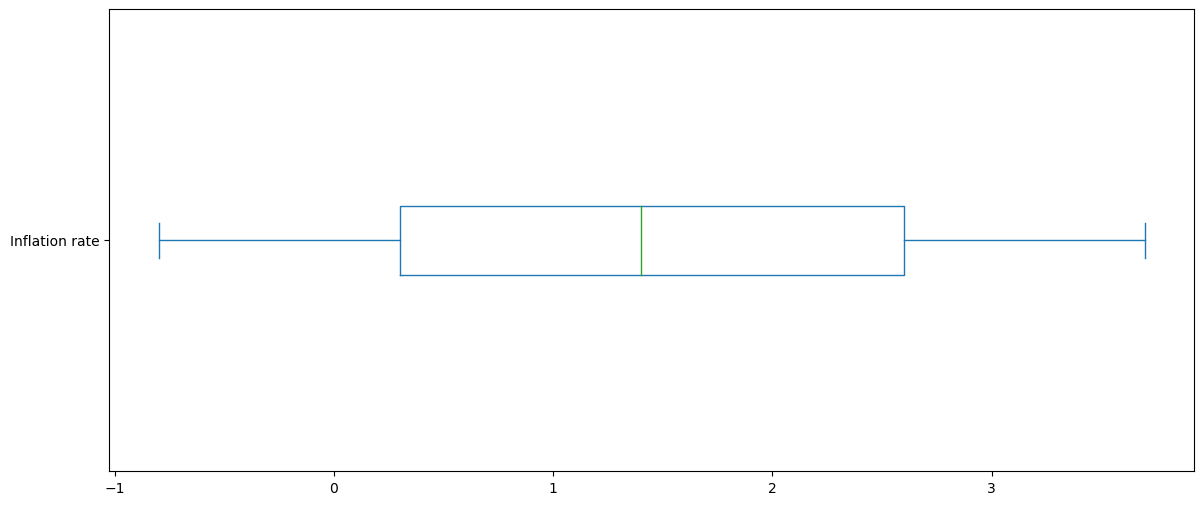

In [62]:
df_train['Inflation rate'].plot(kind='box', vert=False, figsize=(14,6))

In [63]:
df_train.loc[df_train['Target'] == 'Graduate', 'GDP'].value_counts()

GDP
 1.79    4750
 1.74    4445
 2.02    4041
-3.12    4036
 0.32    3841
-1.70    3547
 0.79    3122
 3.51    2904
-4.06    2892
-0.92    2704
Name: count, dtype: int64

In [64]:

graduate_inflation_counts = df_train.loc[df_train['Target'] == 'Graduate', 'Inflation rate'].value_counts()
enrolled_inflation_counts = df_train.loc[df_train['Target'] == 'Enrolled', 'Inflation rate'].value_counts()
dropout_inflation_counts = df_train.loc[df_train['Target'] == 'Dropout', 'Inflation rate'].value_counts()

# Create the DataFrame
inf = pd.DataFrame({
    'Graduate': graduate_inflation_counts,
    'Enrolled': enrolled_inflation_counts,
    'Dropout': dropout_inflation_counts
})

# Fill NaN values with 0
inf = inf.fillna(0)

inf

,Graduate,Enrolled,Dropout
Inflation rate,,,
-0.8,4035.0,2381.0,3767.0
-0.6,0.0,0.0,1.0
-0.3,3122.0,989.0,1668.0
0.3,2704.0,1007.0,2440.0
0.4,0.0,0.0,1.0
0.5,4750.0,1614.0,2106.0
0.6,4041.0,1115.0,1690.0
0.7,1.0,0.0,0.0
1.4,7351.0,2895.0,4269.0


In [66]:
df_train.loc[df_train['Target'] == 'Graduate', ['Inflation rate', 'Nacionality']].value_counts().head(10)
df_train.loc[df_train['Target'] == 'Enrolled', ['Inflation rate', 'Nacionality']].value_counts().head(10)
df_train.loc[df_train['Target'] == 'Dropout', ['Inflation rate', 'Nacionality']].value_counts().head(10)

Inflation rate  Nacionality
 1.4            1              7288
 0.5            1              4728
-0.8            1              4024
 0.6            1              3994
 2.6            1              3821
 3.7            1              3511
-0.3            1              3104
 2.8            1              2879
 0.3            1              2690
 1.4            41               35
Name: count, dtype: int64

In [72]:

df_n1 = df_train.loc[df_train['Target'] == 'Graduate', ['Inflation rate', 'Nacionality']].value_counts().to_frame('Graduate')


df_n2 = df_train.loc[df_train['Target'] == 'Enrolled', ['Inflation rate', 'Nacionality']].value_counts().to_frame('Enrolled')


df_n3 = df_train.loc[df_train['Target'] == 'Dropout', ['Inflation rate', 'Nacionality']].value_counts().to_frame('Dropout')

# Concatenate the three DataFrame slices into a single DataFrame
final_df = pd.concat([df_n1, df_n2, df_n3], axis=1)

#Showing the dataframe
final_df.head(20)

,,Graduate,Enrolled,Dropout
Inflation rate,Nacionality,,,
1.4,1,7288.0,2869.0,4232.0
0.5,1,4728.0,1604.0,2089.0
-0.8,1,4024.0,2374.0,3750.0
0.6,1,3994.0,1095.0,1664.0
2.6,1,3821.0,2541.0,4036.0
3.7,1,3511.0,1224.0,2594.0
-0.3,1,3104.0,982.0,1657.0
2.8,1,2879.0,1156.0,2676.0
0.3,1,2690.0,1002.0,2425.0


<hr/>

<h3 style="color: #92B24B;">GDP</h3>

In [119]:
df_train['GDP'].value_counts()

GDP
 0.32    10436
-3.12    10184
 1.74     9390
 1.79     8471
-1.70     7379
 2.02     6846
-4.06     6757
-0.92     6151
 0.79     5780
 3.51     5123
 0.74        1
Name: count, dtype: int64

<Axes: xlabel='GDP'>

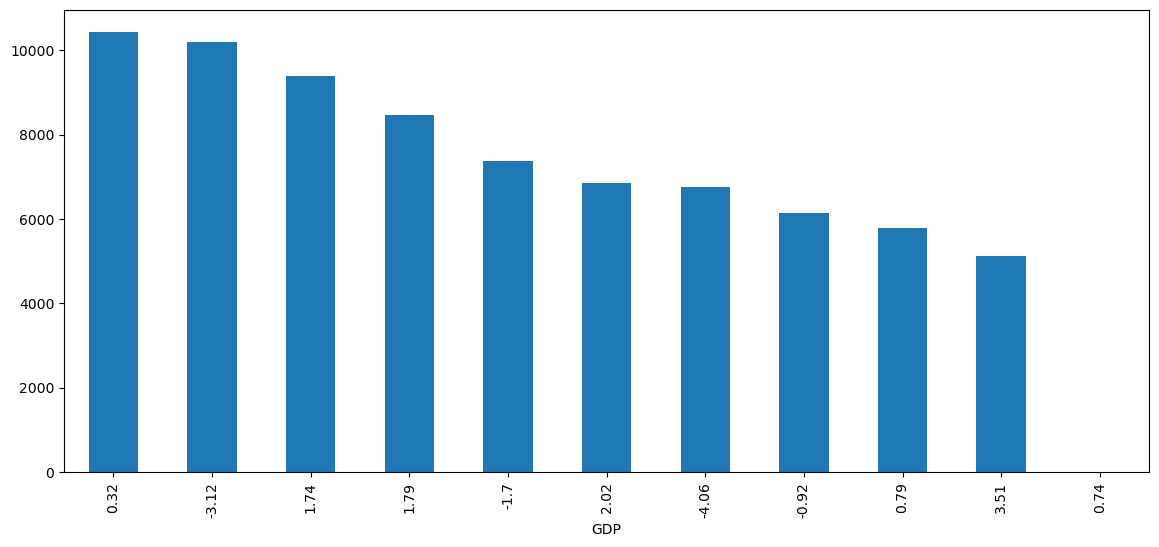

In [131]:
df_train['GDP'].value_counts().plot(kind='bar', figsize=(14, 6))

In [134]:
graduate_gdp_counts = df_train.loc[df_train['Target'] == 'Graduate', 'GDP'].value_counts()
enrolled_gdp_counts = df_train.loc[df_train['Target'] == 'Enrolled', 'GDP'].value_counts()
dropout_gdp_counts = df_train.loc[df_train['Target'] == 'Dropout', 'GDP'].value_counts()

# Create the DataFrame
gdp = pd.DataFrame({
    'Graduate': graduate_gdp_counts,
    'Enrolled': enrolled_gdp_counts,
    'Dropout': dropout_gdp_counts
})

# Fill NaN values with 0
gdp = gdp.fillna(0)

gdp

,Graduate,Enrolled,Dropout
GDP,,,
-4.06,2892.0,1164.0,2701
-3.12,4036.0,2381.0,3767
-1.70,3547.0,1228.0,2604
-0.92,2704.0,1007.0,2440
0.32,3841.0,2547.0,4048
0.74,0.0,0.0,1
0.79,3122.0,989.0,1669
1.74,4445.0,1946.0,2999
1.79,4750.0,1614.0,2107


In [74]:
df_g1 = df_train.loc[df_train['Target'] == 'Graduate', ['GDP', 'Nacionality']].value_counts().to_frame('Graduate')


df_g2 = df_train.loc[df_train['Target'] == 'Enrolled', ['GDP', 'Nacionality']].value_counts().to_frame('Enrolled')


df_g3 = df_train.loc[df_train['Target'] == 'Dropout', ['GDP', 'Nacionality']].value_counts().to_frame('Dropout')

# Concatenate the three DataFrame slices into a single DataFrame
final_df_g = pd.concat([df_g1, df_g2, df_g3], axis=1)

#Showing the dataframe
final_df_g.head(25)

,,Graduate,Enrolled,Dropout
GDP,Nacionality,,,
1.79,1,4728.0,1604.0,2090.0
1.74,1,4430.0,1942.0,2985.0
-3.12,1,4025.0,2374.0,3750.0
2.02,1,3994.0,1095.0,1664.0
0.32,1,3822.0,2541.0,4035.0
-1.70,1,3512.0,1224.0,2594.0
0.79,1,3104.0,982.0,1658.0
-4.06,1,2879.0,1157.0,2676.0
3.51,1,2856.0,927.0,1247.0


<hr/>

<h3 style="color: #92B24B;">Unemployment rate</h3>


<li style="color: #0E66AD; font-weight: bold;">Unemployment rate (%)</li>

<Axes: xlabel='Unemployment rate'>

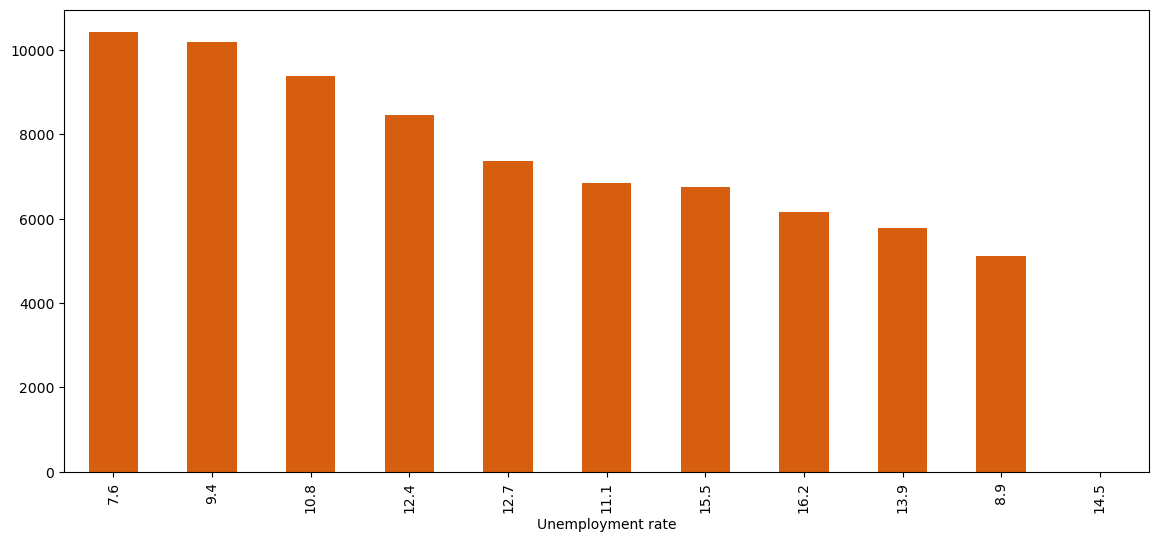

In [75]:
df_train['Unemployment rate'].value_counts().plot(kind='bar',figsize=(14,6), color='#D75E0F')

<Axes: >

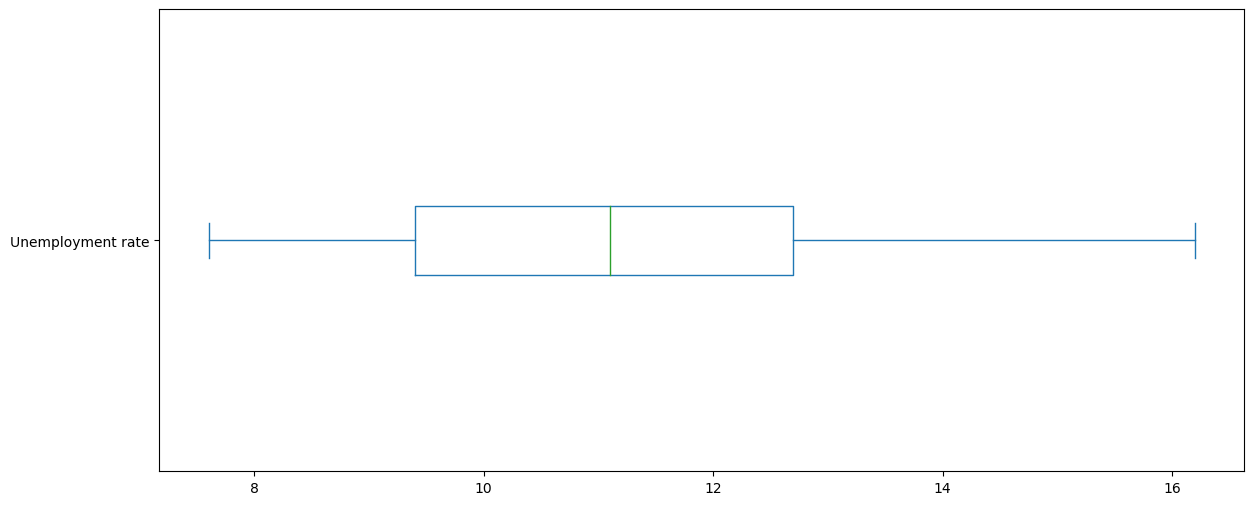

In [76]:
df_train['Unemployment rate'].plot(kind='box', vert=False, figsize=(14,6))

In [77]:
graduate_Unemployment_rate_counts = df_train.loc[df_train['Target'] == 'Graduate', 'Unemployment rate'].value_counts()
enrolled_Unemployment_rate_counts = df_train.loc[df_train['Target'] == 'Enrolled', 'Unemployment rate'].value_counts()
dropout_Unemployment_rate_counts = df_train.loc[df_train['Target'] == 'Dropout', 'Unemployment rate'].value_counts()

# Create the DataFrame
Unemployment_rate = pd.DataFrame({
    'Graduate': graduate_Unemployment_rate_counts,
    'Enrolled': enrolled_Unemployment_rate_counts,
    'Dropout': dropout_Unemployment_rate_counts
})

# Fill NaN values with 0
Unemployment_rate = Unemployment_rate.fillna(0)

Unemployment_rate

,Graduate,Enrolled,Dropout
Unemployment rate,,,
7.6,3840,2547.0,4049
8.9,2907,950.0,1271
9.4,4035,2381.0,3767
10.8,4444,1945.0,2999
11.1,4041,1115.0,1690
12.4,4750,1614.0,2106
12.7,3547,1228.0,2604
13.9,3122,989.0,1670
14.5,1,0.0,1


In [78]:
df_emp1 = df_train.loc[df_train['Target'] == 'Graduate', ['Unemployment rate', 'Nacionality']].value_counts().to_frame('Graduate')

# Create the second DataFrame slice
df_emp2 = df_train.loc[df_train['Target'] == 'Enrolled', ['Unemployment rate', 'Nacionality']].value_counts().to_frame('Enrolled')

# Create the third DataFrame slice
df_emp3 = df_train.loc[df_train['Target'] == 'Dropout', ['Unemployment rate', 'Nacionality']].value_counts().to_frame('Dropout')

# Concatenate the three DataFrame slices into a single DataFrame
final_df_emp = pd.concat([df_emp1, df_emp2, df_emp3], axis=1)

final_df_emp.head(20)

,,Graduate,Enrolled,Dropout
Unemployment rate,Nacionality,,,
12.4,1,4728.0,1604.0,2089.0
10.8,1,4429.0,1941.0,2985.0
9.4,1,4024.0,2374.0,3750.0
11.1,1,3994.0,1095.0,1664.0
7.6,1,3821.0,2541.0,4036.0
12.7,1,3512.0,1224.0,2594.0
13.9,1,3104.0,982.0,1659.0
15.5,1,2878.0,1157.0,2674.0
8.9,1,2859.0,928.0,1248.0


<hr/>

<h3 style="color: #92B24B;">Target</h3>


<li style="color: #0E66AD; font-weight: bold;">Target. The problem is formulated as a three category classification task (dropout, enrolled, and graduate) at the end of the normal duration of the course
</li>

<Axes: xlabel='Target'>

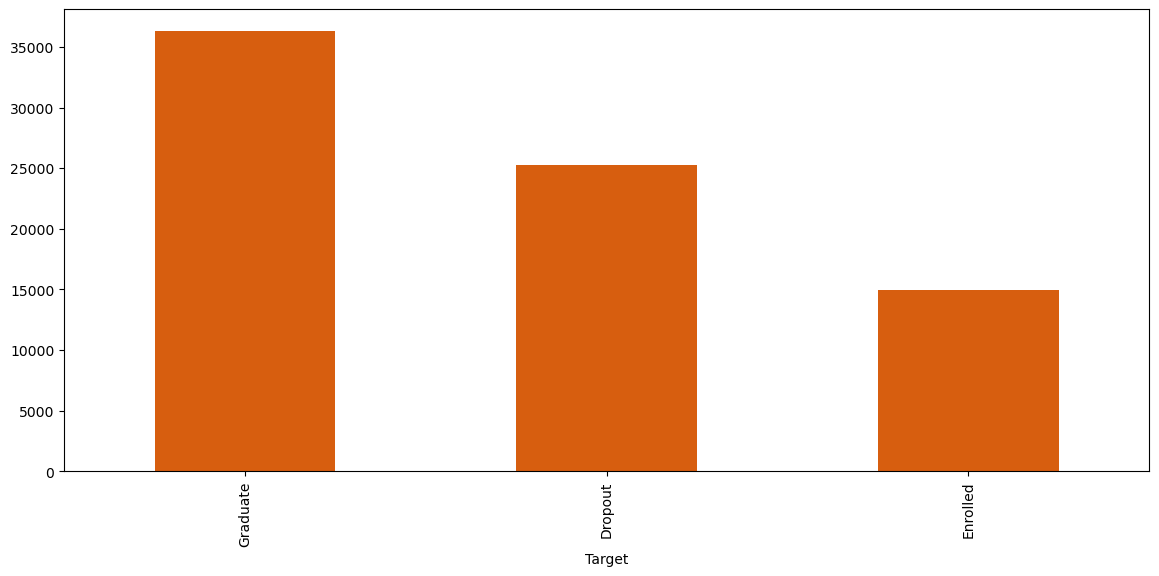

In [139]:
df_train['Target'].value_counts().plot(kind='bar', figsize=(14, 6), color='#D75E0F')

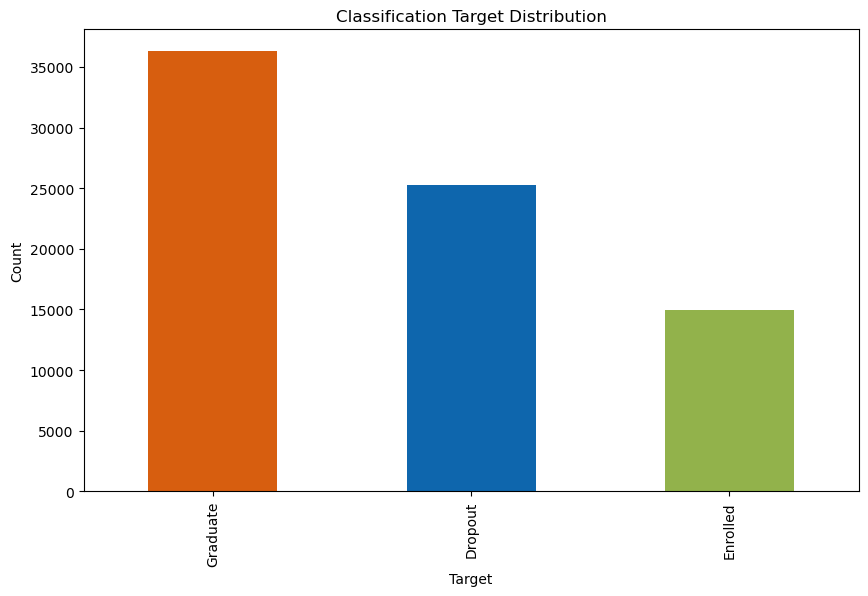

In [138]:

target_variable = df_train['Target']

# Get the value counts for the target variable
target_counts = target_variable.value_counts()

# Create the stacked bar plot
fig, ax = plt.subplots(figsize=(10, 6))
target_counts.plot(kind='bar', stacked=True, color=['#D75E0F', '#0E66AD', '#92B24B'], ax=ax)

# Add labels and title
ax.set_xlabel('Target')
ax.set_ylabel('Count')
ax.set_title('Classification Target Distribution')

# Display the plot
plt.show()

<hr/>